# Demo of Serra's Technique on Covers80

This requires librosa, essentia, and numba to be installed

```bash
pip install librosa
pip install essentia
pip install numba
```

It also requires the <a href = "http://labrosa.ee.columbia.edu/projects/coversongs/covers80/">covers80</a> audio (courtesy of Dan Ellis) to be downloaded to this directory.  You can obtain it at this link:

https://drive.google.com/file/d/1fXSGbtyB0h3qn4wtLwKumAEwnDo1G5xU/view?usp=drive_link


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import librosa
import glob
import IPython.display as ipd
from csmssmtools import *
from cover_alignment import *
from seqalignment import *
from audioutils import *
import IPython.display as ipd

In [2]:
## Step 1: Identify pairs of tracks
import glob
pairs = glob.glob("covers80_audio/*")
pairs = [p for p in pairs if not "list" in p]
tunes  = [glob.glob("{}/*".format(p))[0] for p in pairs]
tunes += [glob.glob("{}/*".format(p))[1] for p in pairs]

In [3]:

chromas = []
hop_length = 512
for tune in tunes:
    ipd.clear_output()
    print(tune)
    y, sr = librosa.load(tune)
    chroma = get_hpcp(y, hop_length, sr)
    chromas.append(chroma)

covers80_audio/My_Heart_Will_Go_On/celine_dion+Au_Coer_Du_Stade+11-My_Heart_Will_Go_On.mp3


In [4]:
avg_fac = 40 # From Serra's paper
chromas = [aggregate_intervals(c, avg_fac, [np.median]) for c in chromas]

## Example alignment

(12, 363) (12, 253)


Text(0.5, 1.0, 'Serra QMax (231.0)')

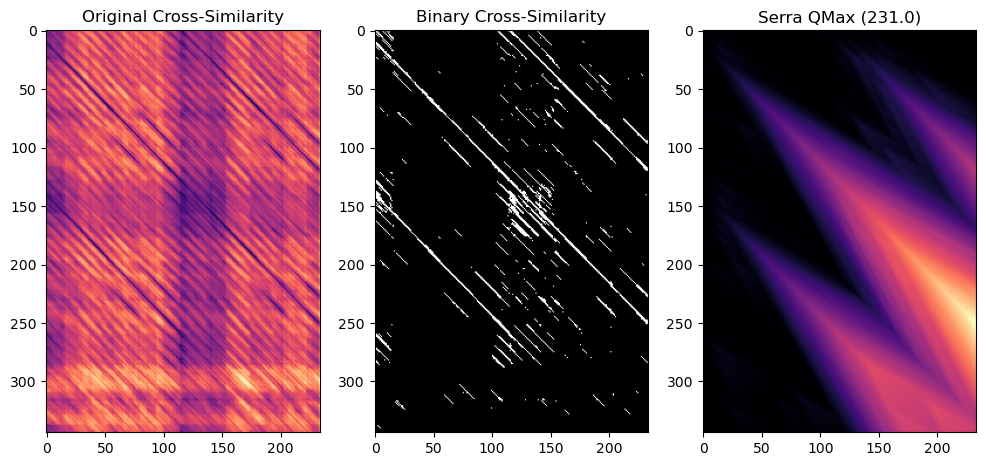

In [31]:
idx = 75
chroma1 = chromas[idx]
chroma2 = chromas[idx+80]
print(chroma1.shape, chroma2.shape)
oti = get_oti(np.mean(chroma1, axis=1), np.mean(chroma2, axis=1))
chroma1 = np.roll(chroma1, oti, axis=0)
csm = get_csm_cosine(chroma1.T, chroma2.T)
csm = sliding_csm(csm, win=20)
B = csm_binary_mutual(csm, kappa=0.1)
(score, S) = qmax(B)

plt.figure(figsize=(12, 8))
plt.subplot(131)
plt.imshow(csm, cmap='magma')
plt.title("Original Cross-Similarity")
plt.subplot(132)
plt.imshow(B, cmap='gray')
plt.title("Binary Cross-Similarity")
plt.subplot(133)
plt.imshow(S, cmap='magma')
plt.title("Serra QMax ({})".format(score))

## All Paris Alignments Chroma Similarity Covers80


In [34]:
kappa = 0.095
wins_per_block = 10
sim = np.zeros((80, 80))
for i in range(80):
    for j in range(80):
        ipd.clear_output()
        print(i, j)
        sim[i, j] = get_alignment_score_serra(chromas[i], chromas[80+j], wins_per_block)

79 79


52/80 Correct


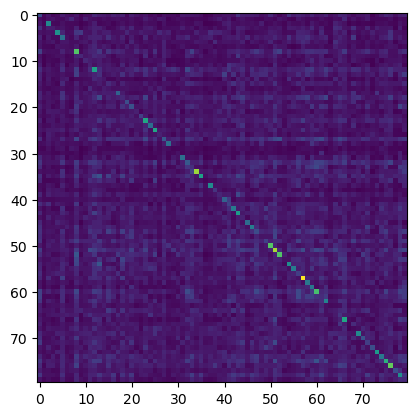

In [36]:
plt.imshow(sim)
correct = np.argmax(sim, axis=1) == np.arange(sim.shape[0])
print("{}/80 Correct".format(np.sum(correct)))